#Variables used in the notebook

#Prerequisites

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Loading data

In [ ]:
with open("/content/autolib_daily_events_postal_code.csv",'r') as r:
  blue = pd.read_csv(r , delimiter = ',')

In [ ]:
blue.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [ ]:
blue.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


##Data understanding

In [ ]:
toclean = blue.copy()

In [ ]:
des = pd.DataFrame(toclean.isnull().sum())
typ = pd.DataFrame(toclean.dtypes)
des = pd.merge(des , typ, right_index = True , left_index = True)
des.columns = ['Number of nulls', 'Data Types']
des["Max"] = ''
des['Min'] = ''

In [ ]:
for r , rows in des.iterrows():
  if rows['Data Types'] == 'int64':
    des.loc[r, 'Max'] = toclean[r].max()
    des.loc[r, 'Min'] = toclean[r].min()

In [ ]:
des

,Number of nulls,Data Types,Max,Min
Postal code,0,int64,95880,75001
date,0,object,,
n_daily_data_points,0,int64,1440,1174
dayOfWeek,0,int64,6,0
day_type,0,object,,
BlueCars_taken_sum,0,int64,1352,0
BlueCars_returned_sum,0,int64,1332,0
Utilib_taken_sum,0,int64,54,0
Utilib_returned_sum,0,int64,58,0
Utilib_14_taken_sum,0,int64,100,0


In [ ]:
toclean['date'].unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

In [ ]:
toclean['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [ ]:
toclean['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [ ]:
len(toclean['Postal code'].unique())

104

##Data Cleaning

###Outliers


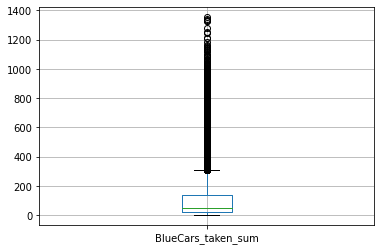

In [ ]:
toclean.boxplot(['BlueCars_taken_sum'])

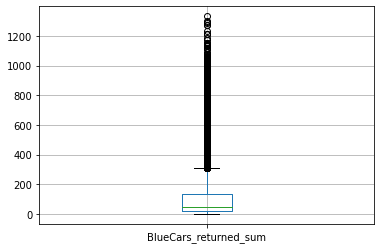

In [ ]:
toclean.boxplot(['BlueCars_returned_sum'])

In [ ]:
fin = toclean.copy()
out = ['BlueCars_taken_sum' , 'BlueCars_returned_sum' ]
for z in out:
  q1 = fin[z].quantile(0.25)
  q3 = fin[z].quantile(0.75)
  iqr = q3 - q1
  lim = iqr * 1.5
  fin = fin [fin[z] >= (q1 - lim)]
  fin = fin [fin[z] <= (q3 + lim)]

In [ ]:
fin.shape

(12810, 13)

In [ ]:
toclean.shape

(16085, 13)

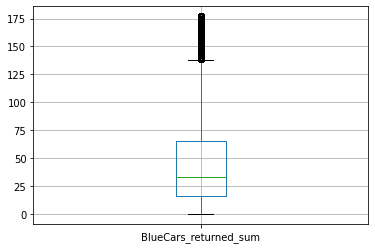

In [ ]:
fin.boxplot(['BlueCars_returned_sum'])

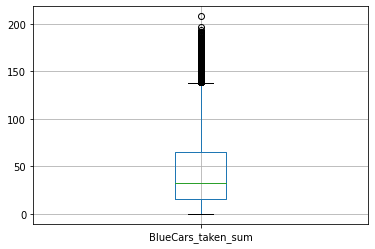

In [ ]:
fin.boxplot(['BlueCars_taken_sum'])

In [ ]:
out = ['BlueCars_taken_sum' , 'BlueCars_returned_sum' ]
for z in out:
  print (z)
  print ("The max is", fin[z].max())
  print ("The third quantile is", fin[z].quantile(0.75))
  print ("The first quantile is", fin[z].quantile(0.25))
  print ("The min is", fin[z].min())
  print ()
  print ()

BlueCars_taken_sum
The max is 208
The third quantile is 65.0
The first quantile is 16.0
The min is 0


BlueCars_returned_sum
The max is 177
The third quantile is 65.0
The first quantile is 16.0
The min is 0




###Dropping of columns

In [ ]:
toclean = fin.copy()
y = toclean.columns
toclean.drop(columns=y[-6:] , inplace= True)

In [ ]:
toclean.reset_index(inplace = True)
toclean

,index,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,0,75001,1/1/2018,1440,0,weekday,110,103
1,1,75001,1/2/2018,1438,1,weekday,98,94
2,2,75001,1/3/2018,1439,2,weekday,138,139
3,3,75001,1/4/2018,1320,3,weekday,104,104
4,4,75001,1/5/2018,1440,4,weekday,114,117
...,...,...,...,...,...,...,...,...
12805,16080,95880,6/15/2018,1440,4,weekday,15,10
12806,16081,95880,6/16/2018,1440,5,weekend,19,19
12807,16082,95880,6/17/2018,1440,6,weekend,33,35
12808,16083,95880,6/18/2018,1440,0,weekday,11,14


#Analysis

In [ ]:
proc = toclean.copy()

####The mean of the postal codes

In [ ]:
g = proc.groupby(['Postal code']).mean()

In [ ]:
h = g.columns
g = g.drop(columns = h[:-2])
g.sort_values(['BlueCars_taken_sum'], ascending = False, inplace = True)

In [ ]:
g

,BlueCars_taken_sum,BlueCars_returned_sum
Postal code,,
75003,155.642857,147.785714
75004,154.712329,154.315068
75002,151.747475,150.515152
92000,149.720721,148.648649
92300,149.486486,149.036036
...,...,...
93150,5.258278,5.225166
94100,4.832258,4.812903
93370,3.744966,3.731544


#### The days of the week

In [ ]:
g = proc.groupby(['dayOfWeek']).mean()

In [ ]:
h = g.columns 
g = g.drop(columns = h[:-2])

In [ ]:
g

,BlueCars_taken_sum,BlueCars_returned_sum
dayOfWeek,,
0,43.134274,43.660920
1,42.626105,42.943838
2,45.201635,45.572207
3,44.744518,44.984649
4,48.049751,47.285240
5,51.382048,50.543728
6,53.680249,53.538766


In [ ]:
er = toclean[toclean['day_type'] == 'weekend']
er['dayOfWeek'].unique()

array([6, 5])

In [ ]:
dayconv= {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thurday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}

<BarContainer object of 7 artists>

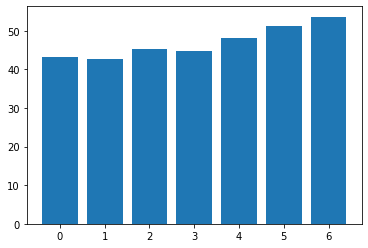

In [ ]:
plt.bar((g.index),g['BlueCars_taken_sum'])

<BarContainer object of 7 artists>

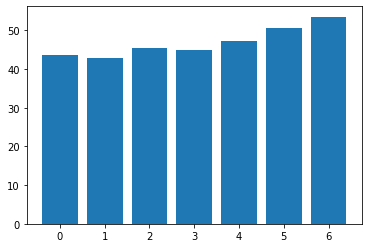

In [ ]:
plt.bar(g.index,g['BlueCars_returned_sum'])

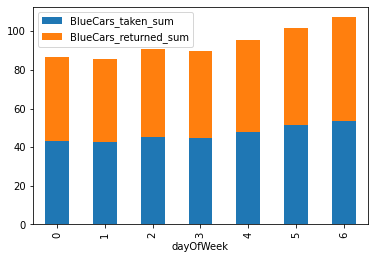

In [ ]:
g.plot.bar(stacked = True)

####Ratios


In [ ]:
g = proc.groupby(['day_type']).mean()

In [ ]:
h = g.columns 
g = g.drop(columns = h[:-2])

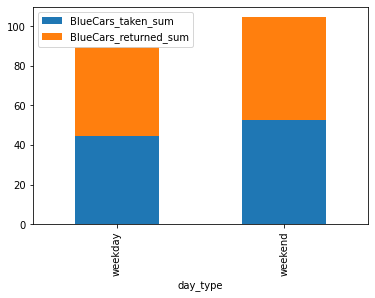

In [ ]:
g.plot.bar(stacked= True)

([<matplotlib.patches.Wedge at 0x7f45c182c1d0>,
 [Text(-0.0030392142945753443, 1.0999958014358382, ''),
  Text(0.003039214294575454, -1.0999958014358382, '')])

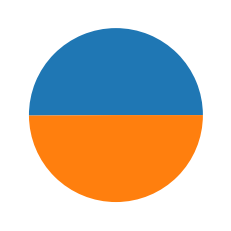

In [ ]:
plt.pie(g.sum())

#Hypothesis testing

#Problem statement

Here we are looking at the data of vehicles being taken from and returned to stations for a car sharing company. The data is collected of the cars being borrowed and returned within a period of days and within a number of stations. Some investigation on the following will be done within this study:
1.	The cars taken correlation with the cars returned.
2.	The difference in the activity within weekends and weekdays.
3.	Sampling methods that can be used to represent the data that are indicative of the whole dataset.


The hypotheses that are formed from the aforementioned are the following:
1.	Null hypothesis: The average of the cars borrowed, and the cars returned is similar. Alternate hypothesis: The average of the borrowed and returned cars is not similar.
2.	Null hypothesis: The activity (borrowing and returning of vehicles) is more on the weekday than on a weekend. Alternate hypothesis: The activity (borrowing and returning of vehicles) is more on the weekday than on a weekend
3.	Null hypothesis: Random samples of postal codes can be picked that will be indicative of the activity of the population. Alternative hypothesis: Random samples of postal codes cannot be picked that will be indicative of the activity of the population.


The reasons for the hypothesis above in order is to find out the following:
1.	Is there enough data to conclude that the stations are in isolation and we can dismiss that one car can be borrowed from one station and be returned to another?
2.	Is the usage of the vehicles based primarily for workers or for leisure and if so which of them has a heavier bias?
3.	Can the dataset be reduced to a smaller size for easier processing?


#Data Description

The data entails the number of data points that were aggregated and the vehicles. Due to the occurrence of the aggregation points being 1440; it is believed that the aggregation was one every minute of the day.

Due to the data cleaning that was done earlier; the vehicle information that is not under the scope of this study has already been eliminated from the dataset.

The data that shall be looked at are the following:


*   Postal Code
*   Date
*   Data Points
*   Day of the week
*   Day type
*   Bluecars Taken 
*   Bluecars Returned








#Hypothesis Testing Procedure

The procedure that shall be used respectively to test the hypothesis that have been mentioned above are the following:


###Mathematical Functions

In [ ]:
def ztest(h0, h1, sdev , pop):
  r = (h1 - h0)/(sdev/(pop**0.5))
  return r

In [ ]:
def ttest(h0,h1,v0,v1,p0,p1):
  r = (abs(h0-h1))/(((v0/p0)+(v1/p1))**0.5)
  return r

###Test 1

For Test 1; the z score shall be sought after, and a double tail normal distribution shall be used for the seeking of the validity of the hypothesis

In [ ]:
stat = proc.describe()
stat

,index,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
count,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000
mean,9499.261124,91638.487822,1431.029196,2.934660,46.851288,46.823731
std,3973.021951,4875.451081,33.725980,2.002464,41.473763,41.163345
min,0.000000,75001.000000,1174.000000,0.000000,0.000000,0.000000
25%,6349.250000,92220.000000,1439.000000,1.000000,16.000000,16.000000
50%,9654.500000,92650.000000,1440.000000,3.000000,33.000000,33.000000
75%,12881.750000,93800.000000,1440.000000,5.000000,65.000000,65.000000
max,16084.000000,95880.000000,1440.000000,6.000000,208.000000,177.000000


In [ ]:
zscore = ttest(stat.iloc[1,4] , stat.iloc[1,5] , stat.iloc[2,4], stat.iloc[0,4] )
zscore

-0.0015225032886933645

###Test 2

For Test 2; The t test shall be used since there are two summarised samples which are the weekday summary and the weekend summary as per the resultant table. Again, a double tail distribution shall be used for validity.

In [ ]:
g = proc.groupby(['day_type']).sum()
stat = g.describe()
stat

,index,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
count,2.000000e+00,2.000000e+00,2.000000e+00,2.00000,2.000000,2.000000
mean,6.084277e+07,5.869445e+08,9.165742e+06,18796.50000,300082.500000,299906.000000
std,3.819817e+07,3.746572e+08,5.852215e+06,700.74282,163946.242752,166110.696609
min,3.383258e+07,3.220219e+08,5.027601e+06,18301.00000,184155.000000,182448.000000
25%,4.733768e+07,4.544832e+08,7.096672e+06,18548.75000,242118.750000,241177.000000
50%,6.084277e+07,5.869445e+08,9.165742e+06,18796.50000,300082.500000,299906.000000
75%,7.434786e+07,7.194058e+08,1.123481e+07,19044.25000,358046.250000,358635.000000
max,8.785295e+07,8.518672e+08,1.330388e+07,19292.00000,416010.000000,417364.000000


In [ ]:
tscore = ttest(stat.iloc[1,4] , stat.iloc[1,5] , (stat.iloc[2,4])** 2, (stat.iloc[2,5])** 2, stat.iloc[0,4], stat.iloc[0,5] )
tscore

0.0010694894358103883

###Test 3

For Test 3; Both a combination of the t test and the z test shall be used in evaluating the postal code data vs the whole population to the given significance values. A double tail distribution shall be used.

In [ ]:
t = proc.copy()
t['sum'] = t['BlueCars_taken_sum'] + t['BlueCars_returned_sum']
t

,index,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,sum
0,0,75001,1/1/2018,1440,0,weekday,110,103,213
1,1,75001,1/2/2018,1438,1,weekday,98,94,192
2,2,75001,1/3/2018,1439,2,weekday,138,139,277
3,3,75001,1/4/2018,1320,3,weekday,104,104,208
4,4,75001,1/5/2018,1440,4,weekday,114,117,231
...,...,...,...,...,...,...,...,...,...
12805,16080,95880,6/15/2018,1440,4,weekday,15,10,25
12806,16081,95880,6/16/2018,1440,5,weekend,19,19,38
12807,16082,95880,6/17/2018,1440,6,weekend,33,35,68
12808,16083,95880,6/18/2018,1440,0,weekday,11,14,25


In [ ]:
pstat = t.describe()
pstat

,index,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,sum
count,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000
mean,9499.261124,91638.487822,1431.029196,2.934660,46.851288,46.823731,93.675020
std,3973.021951,4875.451081,33.725980,2.002464,41.473763,41.163345,82.448223
min,0.000000,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000
25%,6349.250000,92220.000000,1439.000000,1.000000,16.000000,16.000000,32.000000
50%,9654.500000,92650.000000,1440.000000,3.000000,33.000000,33.000000,66.000000
75%,12881.750000,93800.000000,1440.000000,5.000000,65.000000,65.000000,129.000000
max,16084.000000,95880.000000,1440.000000,6.000000,208.000000,177.000000,374.000000


In [ ]:
mean = pstat.iloc[1,6]
pop = pstat.iloc[0,6]
sdev = pstat.iloc[2,6]

In [ ]:
postalstats = pd.DataFrame(proc[('Postal code')].value_counts())
postalstats.columns = ['Population']
postalstats['Mean'] = ''
postalstats['SDev'] = ''
postalstats['zscore'] = ''
postalstats['ttest'] = ''

In [ ]:
for e , row in postalstats.iterrows():
  postalstats.loc[e , 'Mean'] = t[t['Postal code'] == e]['sum'].mean()
  postalstats.loc[e , 'SDev'] = t[t['Postal code'] == e]['sum'].std()

In [ ]:
for z , row in postalstats.iterrows():
  if row['Population'] >= 30:
    postalstats.loc[z , 'zscore'] = ztest( row['Mean'], mean, row['SDev'] , row['Population'])
  else:
    postalstats.loc[z , 'ttest'] = ttest(row['Mean'], mean, (row['SDev'])**2 , sdev**2 , row['Population'], pop) 

In [ ]:
postalstats

,Population,Mean,SDev,zscore,ttest
94130,156,76.7756,31.251,6.75412,
92400,156,209.269,43.7526,-32.9985,
92230,156,106.679,22.5606,-7.19953,
92270,156,54.609,16.5376,29.5046,
92310,156,108.526,28.7453,-6.45269,
...,...,...,...,...,...
75007,2,29,11.3137,,8.05107
75014,2,67.5,19.0919,,1.93607
75010,2,65,36.7696,,1.10245
75018,2,82.5,26.163,,0.603587


#Hypothesis Testing Results

The results shall be tested in the following way. For the z score values the critical values with the significance value of 0.05 and 0.01 shall respectively be compared to 1.645 and 2.33.

Using the above:

###Test 1

In [ ]:
abs(zscore) > 1.645

False

In [ ]:
abs(zscore) > 2.33

False

With the results above the null hypothesis is not rejected since the means of the vehicles taken and those returned are within the test similar.

###Test 2

In [ ]:
from scipy import stats

In [ ]:
N = 2
df = 2*N - 2
stats.t.cdf(tscore, df=df)

0.5003781215081099

For the second test: The null hypothesis is rejected. There is a 50% probability that Borrowing cars on a weekday is more than borrowing cars on a weekend.

###Test 3

In [ ]:
tes = postalstats[postalstats['zscore'] != '']
tes.drop(columns= ['Population', 'Mean', 'SDev','ttest'], inplace =True)
tes['0.05'] = abs(tes['zscore']) > 1.645
tes['0.01'] = abs(tes['zscore']) > 2.33


In [ ]:
tes[tes['0.05'] == False]

,zscore,0.05,0.01
93500,0.0365587,False,False
94120,0.773766,False,False
78000,1.05089,False,False


In [ ]:
tes[tes['0.01'] == False]

,zscore,0.05,0.01
93500,0.0365587,False,False
94120,0.773766,False,False
78000,1.05089,False,False


Using the z test the only stations that can be used as indicative of the whole scope of the dataset are the ones above which have similar statistics to the whole population

For the third test: The null hypothesis is rejected. There are three stations (93500,94120 and 78000) can be used as vague indicators of the whole population as per the study.

#Discussion of Test Sensitivity  

From the data tested above; the sensitivity changes are the same. Meaning that the data has a sililar prescision that in all cases where the changes in sensitivity could be applied, The results showed no difference.

#Summary and Conclusions

The Postal codes 93500,94120 and 78000 are the most indicative representation of the whole dataset.

Vehicles that are borrowed have a good chance of being returned.

There is a good chance that the borrowing and returning of cars within weekdays are higher than on weekends